In [6]:
#imports

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [7]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
#model.add(layers.Dense(2704, activation='relu'))
#model.add(layers.Dense(1352, activation='relu'))
model.add(layers.Dense(676, activation='relu'))
model.add(layers.Dense(338, activation='relu'))
model.add(layers.Dense(169, activation='relu'))
model.add(layers.Dense(85, activation='relu'))
model.add(layers.Dense(42, activation='relu'))
model.add(layers.Dense(21, activation='relu'))
model.add(layers.Dense(11, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(3, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 676)            │       914,628 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 338)            │       228,826 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 169)            │        57,291 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 85)             │        14,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 42)             │         3,612 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 11)             │           242 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,220,121 (4.65 MB)

 Trainable params: 1,220,121 (4.65 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
'''
22 weights
23 bias 0
'''
x=model.get_weights()[22]
print((x))

[[-0.34735405]
 [-0.33901918]]


In [9]:
'''
Layer 0 is conv => 2 arrays => 3x3x1 and 1 bias
Layer 3 is dense => 2 arrays => 169x85 and 85 bias
so on..
'''
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsParallelSparse"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [10]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeightsParallelSparse\layer_number_0.npz
Layer 1 has no weights to save.
Layer 2 has no weights to save.
Saved parameters for layer 3 to InitWeightsParallelSparse\layer_number_3.npz
Saved parameters for layer 4 to InitWeightsParallelSparse\layer_number_4.npz
Saved parameters for layer 5 to InitWeightsParallelSparse\layer_number_5.npz
Saved parameters for layer 6 to InitWeightsParallelSparse\layer_number_6.npz
Saved parameters for layer 7 to InitWeightsParallelSparse\layer_number_7.npz
Saved parameters for layer 8 to InitWeightsParallelSparse\layer_number_8.npz
Saved parameters for layer 9 to InitWeightsParallelSparse\layer_number_9.npz
Saved parameters for layer 10 to InitWeightsParallelSparse\layer_number_10.npz
Saved parameters for layer 11 to InitWeightsParallelSparse\layer_number_11.npz
Saved parameters for layer 12 to InitWeightsParallelSparse\layer_number_12.npz
Saved parameters for layer 13 to InitWeightsParallelSparse\layer_number_13.npz


In [11]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} ")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 
Layer 1 has no weights.
Layer 2 has no weights.
Layer 3 
Layer 4 
Layer 5 
Layer 6 
Layer 7 
Layer 8 
Layer 9 
Layer 10 
Layer 11 
Layer 12 
Layer 13 


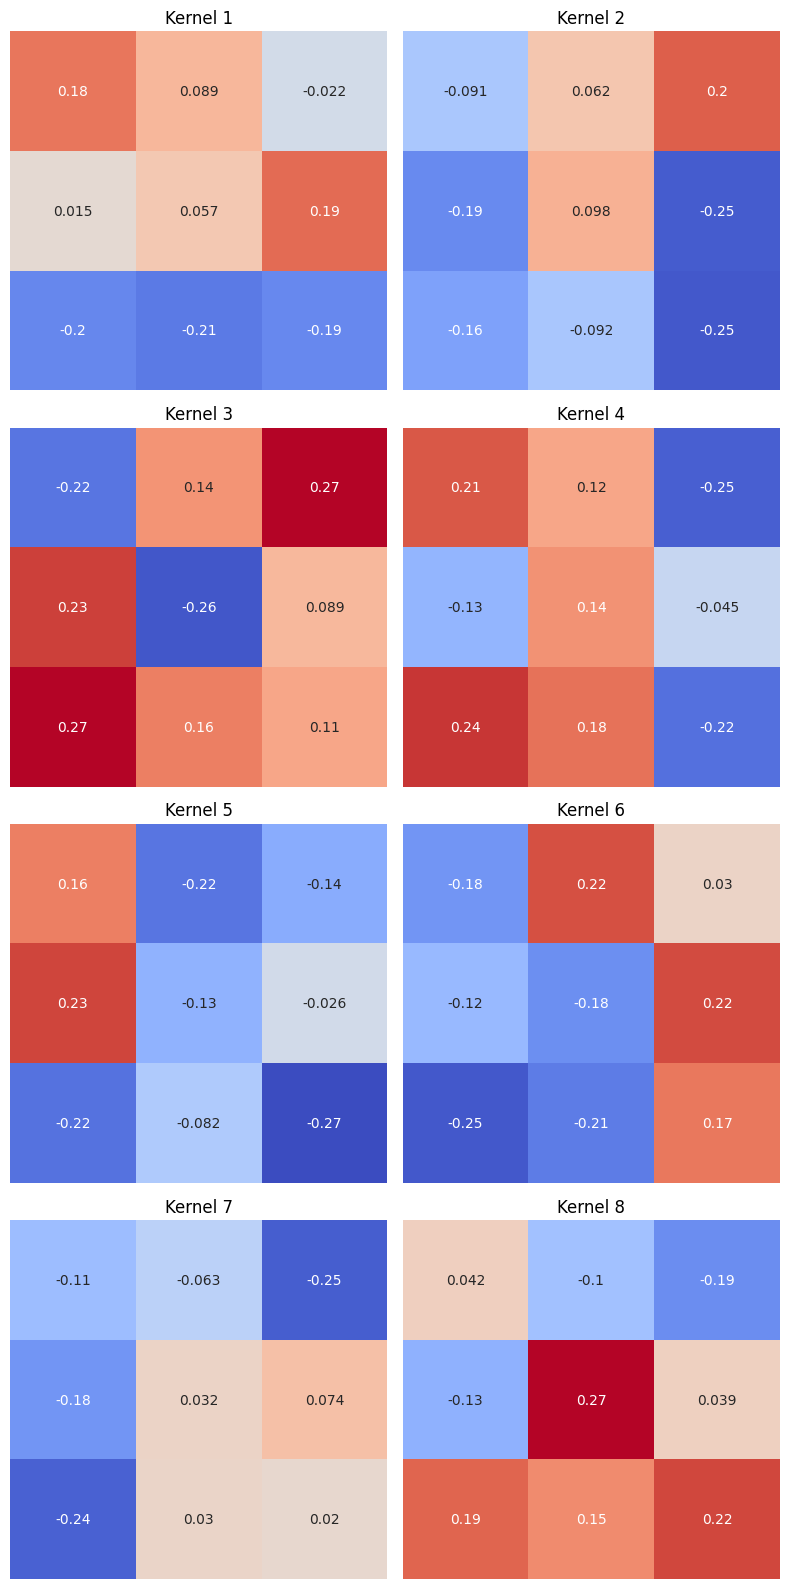

In [12]:
kernels = model.layers[0].get_weights()[0]
min_val = np.min(kernels)
max_val = np.max(kernels)
selected_kernels = list(range(8))

fig, axes = plt.subplots(4,2, figsize=(8, 16))
for i, kernel_idx in enumerate(selected_kernels):
    row, col = divmod(i, 2)
    kernel = kernels[:, :, 0, kernel_idx]  # 3x3 for each kernel
    sns.heatmap(kernel, vmin=min_val, vmax=max_val, annot=True, cmap="coolwarm", cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f'Kernel {kernel_idx+1}')
    axes[row, col].axis('off')
plt.tight_layout()
plt.show()


In [13]:
# # Function to plot kernel
# def plot_kernel(kernel, title):
#     plt.figure(figsize=(6, 6))
#     # Extract the 2D slice of the kernel weights
#     kernel_2d = kernel.reshape(3,3) # Assumes single channel filter
#     sns.heatmap(kernel_2d, annot=True, cmap="coolwarm", cbar=True)
#     plt.title(title)
#     plt.show()

In [14]:
# '''
# layers[0].weights
# 0 => (3,3,1,32)
# 1 => 32 len list of bias
# '''
# x = model.layers[0].get_weights()  
# kernel=(np.array(x[0][:,:,:,0]))
# print(kernel)
# plot_kernel(kernel, 'Initial Weights of Kernel 0')


In [15]:
# # Get all 32 kernels (shape: 3x3x1 for each of the 32 filters)
# kernels = model.layers[0].get_weights()[0]

# # Flatten the kernels to find the global min and max across all of them
# min_val = np.min(kernels)
# max_val = np.max(kernels)

# # Select 4 kernels to visualize (for example: 0, 1, 2, 3)
# selected_kernels = [0, 1, 2, 3]

# # Set up the plot grid (2 rows, 2 columns)
# fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# # Plot each kernel as a heatmap
# for i, kernel_idx in enumerate(selected_kernels):
#     row, col = divmod(i, 2)
#     kernel = kernels[:, :, 0, kernel_idx]  # 3x3 for each kernel
#     sns.heatmap(kernel, vmin=min_val, vmax=max_val, annot=True, cmap="coolwarm", cbar=False, ax=axes[row, col])
#     axes[row, col].set_title(f'Kernel {kernel_idx+1}')
#     axes[row, col].axis('off')

# # Adjust the layout
# plt.tight_layout()
# plt.show()

In [16]:
# # Get all 32 kernels (shape: 3x3x1 for each of the 32 filters)
# kernels = model.layers[0].get_weights()[0]

# # Flatten the kernels to find the global min and max across all of them
# min_val = np.min(kernels)
# max_val = np.max(kernels)

# # Set up the plot grid (8 rows, 4 columns to display 32 kernels)
# fig, axes = plt.subplots(8, 4, figsize=(12, 12))

# # Plot each kernel as a heatmap
# for i in range(32):
#     row, col = divmod(i, 4)
#     kernel = kernels[:, :, 0, i]  # 3x3 for each kernel
#     sns.heatmap(kernel, vmin=min_val, vmax=max_val, cmap='coolwarm', cbar=False, ax=axes[row, col])
#     axes[row, col].set_title(f'Kernel {i+1}')
#     axes[row, col].axis('off')

# # Adjust the layout
# plt.tight_layout()
# plt.show()
